# Protein parameters analysis

The program performs most of the same functions as the Expasy ProtParam tool.

In [1]:
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis

# record = SeqIO.read("../data/sequence.fasta", "fasta")
# For Antibody
record_iterator = SeqIO.parse("../data/sequence.fasta", "fasta")
first_record = next(record_iterator)
second_record = next(record_iterator)


def getMF(subSeq):
    listofaminoacids = []
    # Dictionary for each amino acid with atoms for each
    A = {"C": 3, "H": 7, "N": 1, "O": 2, "S": 0}
    R = {"C": 6, "H": 14, "N": 4, "O": 2, "S": 0}
    N = {"C": 4, "H": 8, "N": 2, "O": 3, "S": 0}
    D = {"C": 4, "H": 7, "N": 1, "O": 4, "S": 0}
    C = {"C": 3, "H": 7, "N": 1, "O": 2, "S": 1}
    Q = {"C": 5, "H": 10, "N": 2, "O": 3, "S": 0}
    E = {"C": 5, "H": 9, "N": 1, "O": 4, "S": 0}
    G = {"C": 2, "H": 5, "N": 1, "O": 2, "S": 0}
    H = {"C": 6, "H": 9, "N": 3, "O": 2, "S": 0}
    I = {"C": 6, "H": 13, "N": 1, "O": 2, "S": 0}
    L = {"C": 6, "H": 13, "N": 1, "O": 2, "S": 0}
    K = {"C": 6, "H": 14, "N": 2, "O": 2, "S": 0}
    M = {"C": 5, "H": 11, "N": 1, "O": 2, "S": 1}
    F = {"C": 9, "H": 11, "N": 1, "O": 2, "S": 0}
    P = {"C": 5, "H": 9, "N": 1, "O": 2, "S": 0}
    S = {"C": 3, "H": 7, "N": 1, "O": 3, "S": 0}
    T = {"C": 4, "H": 9, "N": 1, "O": 3, "S": 0}
    W = {"C": 11, "H": 12, "N": 2, "O": 2, "S": 0}
    Y = {"C": 9, "H": 11, "N": 1, "O": 3, "S": 0}
    V = {"C": 5, "H": 11, "N": 1, "O": 2, "S": 0}

    dictOfAmino = {
        "A": A,
        "R": R,
        "N": N,
        "D": D,
        "C": C,
        "Q": Q,
        "E": E,
        "G": G,
        "H": H,
        "I": I,
        "L": L,
        "K": K,
        "M": M,
        "F": F,
        "P": P,
        "S": S,
        "T": T,
        "W": W,
        "Y": Y,
        "V": V,
    }
    mySeq = subSeq
    analysis = ProteinAnalysis(mySeq)
    listofaminoacids.append(analysis.count_amino_acids())

    for i in listofaminoacids:
        carbonTotal = 0
        hydrogenTotal = 0
        oxygenTotal = 0
        nitrogenTotal = 0
        sulfurTotal = 0
        peptideBonds = 0

        for value in i:
            for amino in dictOfAmino:

                if value == amino:
                    peptideBonds = peptideBonds + i[value]
                    thisAmino = {}
                    thisAmino = dictOfAmino[amino]
                    carbonTotal = carbonTotal + (i[value] * thisAmino["C"])
                    hydrogenTotal = hydrogenTotal + (i[value] * thisAmino["H"])
                    oxygenTotal = oxygenTotal + (i[value] * thisAmino["O"])
                    nitrogenTotal = nitrogenTotal + (i[value] * thisAmino["N"])
                    sulfurTotal = sulfurTotal + (i[value] * thisAmino["S"])

        # Correcting totals for peptide bond loss of water
        peptideBonds = peptideBonds - 1
        hydrogenTotal = hydrogenTotal - (peptideBonds * 2)
        oxygenTotal = oxygenTotal - (peptideBonds * 1)
        outString = (
            "C"
            + str(carbonTotal)
            + "H"
            + str(hydrogenTotal)
            + "N"
            + str(nitrogenTotal)
            + "O"
            + str(oxygenTotal)
            + "S"
            + str(sulfurTotal)
        )
        total_atom = (
            carbonTotal + hydrogenTotal + nitrogenTotal + oxygenTotal + sulfurTotal
        )
        return outString, total_atom


# print(record)
my_seq = str(first_record.seq)
target_name = first_record.name

total_aa = len(my_seq)
analyzed_seq = ProteinAnalysis(my_seq)
mw = analyzed_seq.molecular_weight()
epsilon_prot = analyzed_seq.molar_extinction_coefficient()
instab = analyzed_seq.instability_index()

# print
print(f"# Name of target protein: {target_name:->40}")
print(f"# Molecular weight(Dalton): {mw:->38,.0f}")
print(f"# Total number of amino acid: {total_aa:->36}")
print(f"# Chemical formula: {getMF(my_seq)[0]:->46}")
print(f"# Total number of atom is: {getMF(my_seq)[1]:->39}")
print(
    f"# Extinction coefficient(reduced): {epsilon_prot[0]:->31}"
)  # with reduced cysteine
abs_ = epsilon_prot[0] / analyzed_seq.molecular_weight()
print(f"# Reduced Abs 0.1%(=1 g/L): {abs_:->38,.3f}")
print(f"# Extinction coefficient(non-reduced): {epsilon_prot[1]:->27}")
abs_r = epsilon_prot[1] / analyzed_seq.molecular_weight()
print(f"# Non-reduced Abs 0.1%(=1 g/L): {abs_r:->34,.3f}")
print(f"# Theoretical pI: {analyzed_seq.isoelectric_point():->48.3f}")
print(f"# Aromaticity: {analyzed_seq.aromaticity()*100:->50,.2f}%")
gravy_value = analyzed_seq.gravy()
print(f"# The GRAVY value is {gravy_value:->45,.3f}")
if gravy_value > 0:
    print(f"  {target_name} is more hydrophobic protein.")
else:
    print(f"  {target_name} is more hydrophilic protein.")
print(f"# The instability index: {instab:->41,.3f}")
if instab >= 40:
    print(f"  {target_name} is seems unstable.")
else:
    print(f"  {target_name} is seems stable.")

# Name of target protein: ----------------------------------B20_HC
# Molecular weight(Dalton): --------------------------------49,078
# Total number of amino acid: ---------------------------------450
# Chemical formula: -------------------------C2198H3377N581O666S15
# Total number of atom is: -----------------------------------6837
# Extinction coefficient(reduced): --------------------------92820
# Reduced Abs 0.1%(=1 g/L): ---------------------------------1.891
# Extinction coefficient(non-reduced): ----------------------93445
# Non-reduced Abs 0.1%(=1 g/L): -----------------------------1.904
# Theoretical pI: -------------------------------------------8.210
# Aromaticity: ----------------------------------------------9.78%
# The GRAVY value is ----------------------------------------0.337
  B20_HC is more hydrophilic protein.
# The instability index: -----------------------------------43.002
  B20_HC is seems unstable.


In [2]:
# print(record)
my_seq = str(second_record.seq)
target_name = second_record.name

total_aa = len(my_seq)
analyzed_seq = ProteinAnalysis(my_seq)
mw = analyzed_seq.molecular_weight()
epsilon_prot = analyzed_seq.molar_extinction_coefficient()
instab = analyzed_seq.instability_index()

# print
print(f"# Name of target protein: {target_name:->40}")
print(f"# Molecular weight(Dalton): {mw:->38,.0f}")
print(f"# Total number of amino acid: {total_aa:->36}")
print(f"# Chemical formula: {getMF(my_seq)[0]:->46}")
print(f"# Total number of atom is: {getMF(my_seq)[1]:->39}")
print(
    f"# Extinction coefficient(reduced): {epsilon_prot[0]:->31}"
)  # with reduced cysteine
abs_ = epsilon_prot[0] / analyzed_seq.molecular_weight()
print(f"# Reduced Abs 0.1%(=1 g/L): {abs_:->38,.3f}")
print(f"# Extinction coefficient(non-reduced): {epsilon_prot[1]:->27}")
abs_r = epsilon_prot[1] / analyzed_seq.molecular_weight()
print(f"# Non-reduced Abs 0.1%(=1 g/L): {abs_r:->34,.3f}")
print(f"# Theoretical pI: {analyzed_seq.isoelectric_point():->48.3f}")
print(f"# Aromaticity: {analyzed_seq.aromaticity()*100:->50,.2f}%")
gravy_value = analyzed_seq.gravy()
print(f"# The GRAVY value is {gravy_value:->45,.3f}")
if gravy_value > 0:
    print(f"  {target_name} is more hydrophobic protein.")
else:
    print(f"  {target_name} is more hydrophilic protein.")
print(f"# The instability index: {instab:->41,.3f}")
if instab >= 40:
    print(f"  {target_name} is seems unstable.")
else:
    print(f"  {target_name} is seems stable.")

# Name of target protein: ----------------------------------B20_LC
# Molecular weight(Dalton): --------------------------------23,231
# Total number of amino acid: ---------------------------------214
# Chemical formula: --------------------------C1016H1603N279O332S6
# Total number of atom is: -----------------------------------3236
# Extinction coefficient(reduced): --------------------------22920
# Reduced Abs 0.1%(=1 g/L): ---------------------------------0.987
# Extinction coefficient(non-reduced): ----------------------23170
# Non-reduced Abs 0.1%(=1 g/L): -----------------------------0.997
# Theoretical pI: -------------------------------------------8.564
# Aromaticity: ----------------------------------------------8.41%
# The GRAVY value is ----------------------------------------0.409
  B20_LC is more hydrophilic protein.
# The instability index: -----------------------------------57.615
  B20_LC is seems unstable.


In [3]:
# print(record)
my_seq = str(second_record.seq) + str(first_record.seq)
# target_name = first_record.name + '+' + second_record.name
target_name = first_record.name[:-3]

total_aa = len(my_seq)
analyzed_seq = ProteinAnalysis(my_seq)
mw = analyzed_seq.molecular_weight()
epsilon_prot = analyzed_seq.molar_extinction_coefficient()
instab = analyzed_seq.instability_index()

# print
print(f"# Name of target protein: {target_name:->40}")
print(f"# Molecular weight(Dalton): {mw:->38,.0f}")
print(f"# Total number of amino acid: {total_aa:->36}")
print(f"# Chemical formula: {getMF(my_seq)[0]:->46}")
print(f"# Total number of atom is: {getMF(my_seq)[1]:->39}")
print(
    f"# Extinction coefficient(reduced): {epsilon_prot[0]:->31}"
)  # with reduced cysteine
abs_ = epsilon_prot[0] / analyzed_seq.molecular_weight()
print(f"# Reduced Abs 0.1%(=1 g/L): {abs_:->38,.3f}")
print(f"# Extinction coefficient(non-reduced): {epsilon_prot[1]:->27}")
abs_r = epsilon_prot[1] / analyzed_seq.molecular_weight()
print(f"# Non-reduced Abs 0.1%(=1 g/L): {abs_r:->34,.3f}")
print(f"# Theoretical pI: {analyzed_seq.isoelectric_point():->48.3f}")
print(f"# Aromaticity: {analyzed_seq.aromaticity()*100:->50,.2f}%")
gravy_value = analyzed_seq.gravy()
print(f"# The GRAVY value is {gravy_value:->45,.3f}")
if gravy_value > 0:
    print(f"  {target_name} is more hydrophobic protein.")
else:
    print(f"  {target_name} is more hydrophilic protein.")
print(f"# The instability index: {instab:->41,.3f}")
if instab >= 40:
    print(f"  {target_name} is seems unstable.")
else:
    print(f"  {target_name} is seems stable.")

# Name of target protein: -------------------------------------B20
# Molecular weight(Dalton): --------------------------------72,290
# Total number of amino acid: ---------------------------------664
# Chemical formula: -------------------------C3214H4978N860O997S21
# Total number of atom is: ----------------------------------10070
# Extinction coefficient(reduced): -------------------------115740
# Reduced Abs 0.1%(=1 g/L): ---------------------------------1.601
# Extinction coefficient(non-reduced): ---------------------116740
# Non-reduced Abs 0.1%(=1 g/L): -----------------------------1.615
# Theoretical pI: -------------------------------------------8.425
# Aromaticity: ----------------------------------------------9.34%
# The GRAVY value is ----------------------------------------0.360
  B20 is more hydrophilic protein.
# The instability index: -----------------------------------47.726
  B20 is seems unstable.


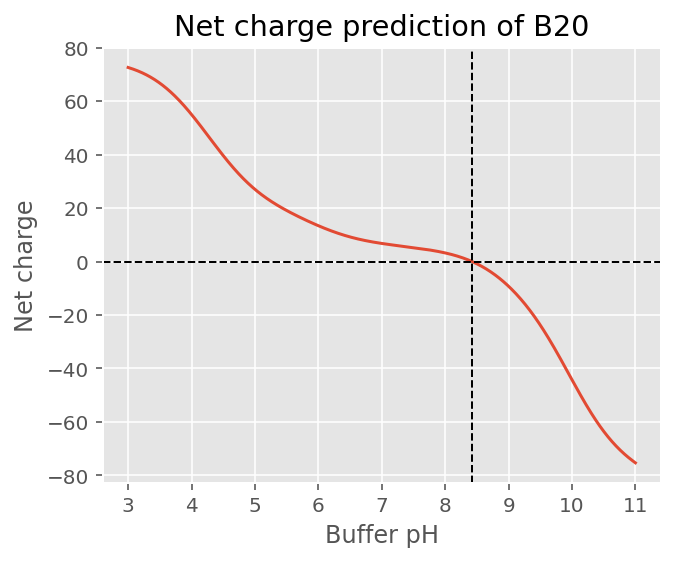

In [4]:
# charge = analyzed_seq.charge_at_pH(7.4)
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

fig = plt.figure(figsize=(5, 4))
ax = plt.axes()
x = np.linspace(3, 11, 1000)
ax.plot(x, analyzed_seq.charge_at_pH(x))
# ax.annotate('Positve charge', xy =(4, 20))
# ax.annotate('Negative charge', xy =(9, -20))
pi_value = analyzed_seq.isoelectric_point()
# ax.annotate('pI point', xy=(pi_value, 2))
plt.axhline(y=0, color="k", linestyle="--", linewidth=1)
plt.axvline(pi_value, color="k", linestyle="--", linewidth=1)
plt.xlabel("Buffer pH")
plt.ylabel("Net charge")
plt.title(f"Net charge prediction of {target_name}")
plt.show()

- Molecular weight

  - Amino acids are the building blocks that form polypeptides and ultimately proteins. Calculates the molecular weight of a protein.

- Chemical composition

  - A chemical formula is a way of presenting information about the chemical proportions of atoms that constitute a particular chemical compound or molecule, using chemical element symbols, numbers.

- Extinction coefficient
  - Extinction (or extinction coefficient) is defined as the ratio of maximum to minimum transmission of a beam of light that passes through a polarization optical train. extinction coefficient in units of  $M^{-1} cm^{-1}$, at 280 nm measured in water.

- Theoretical pI
  - The isoelectric point (pI, pH(I), IEP), is the pH at which a molecule carries no net electrical charge or is electrically neutral in the statistical mean. The pI value can affect the solubility of a molecule at a given pH. Such molecules have minimum solubility in water or salt solutions at the pH that corresponds to their pI and often precipitate out of solution. Biological amphoteric molecules such as proteins contain both acidic and basic functional groups.

- Aromaticity
  - Calculate the aromaticity according to Lobry, 1994. Calculates the aromaticity value of a protein according to Lobry, 1994. It is simply the relative frequency of Phe+Trp+Tyr.

- GRAVY
  - The GRAVY value is calculated by adding the hydropathy value for each residue and dividing by the length of the sequence (Kyte and Doolittle; 1982). A higher value is more hydrophobic. A lower value is more hydrophilic.

- Instability_index
  - Implementation of the method of Guruprasad et al. (1990, Protein Engineering, 4, 155-161). This method tests a protein for stability. Any value above 40 means the protein is unstable (=has a short half life).

## Amino acid composition

We can easily count the number of each type of amino acid.

Total number of positively charged residues(Arg + Lys):--------62
Total number of negatively charged residues(Asp + Glu):--------56


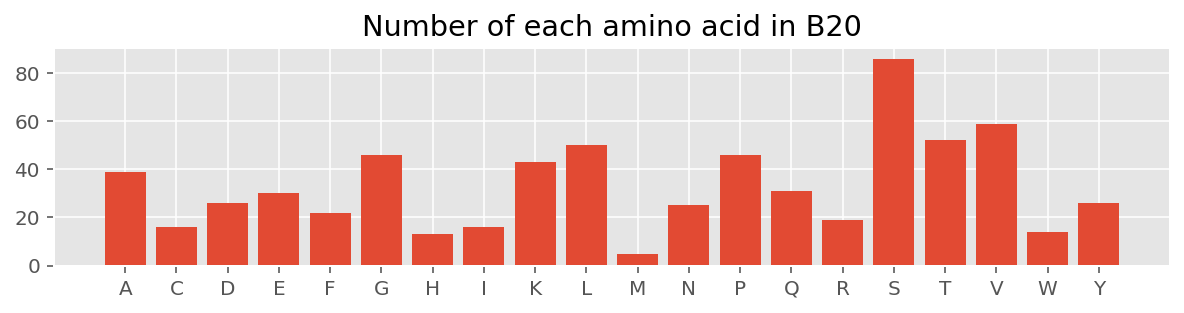

In [5]:
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(10, 2))
plt.style.use("ggplot")

data = analyzed_seq.count_amino_acids()
names = list(data.keys())
values = list(data.values())

negative_res = data["D"] + data["E"]
positive_res = data["K"] + data["R"]

print(f"Total number of positively charged residues(Arg + Lys):{positive_res:->10}")
print(f"Total number of negatively charged residues(Asp + Glu):{negative_res:->10}")


plt.bar(range(len(data)), values, tick_label=names)
plt.title(f"Number of each amino acid in {target_name}")
plt.show()

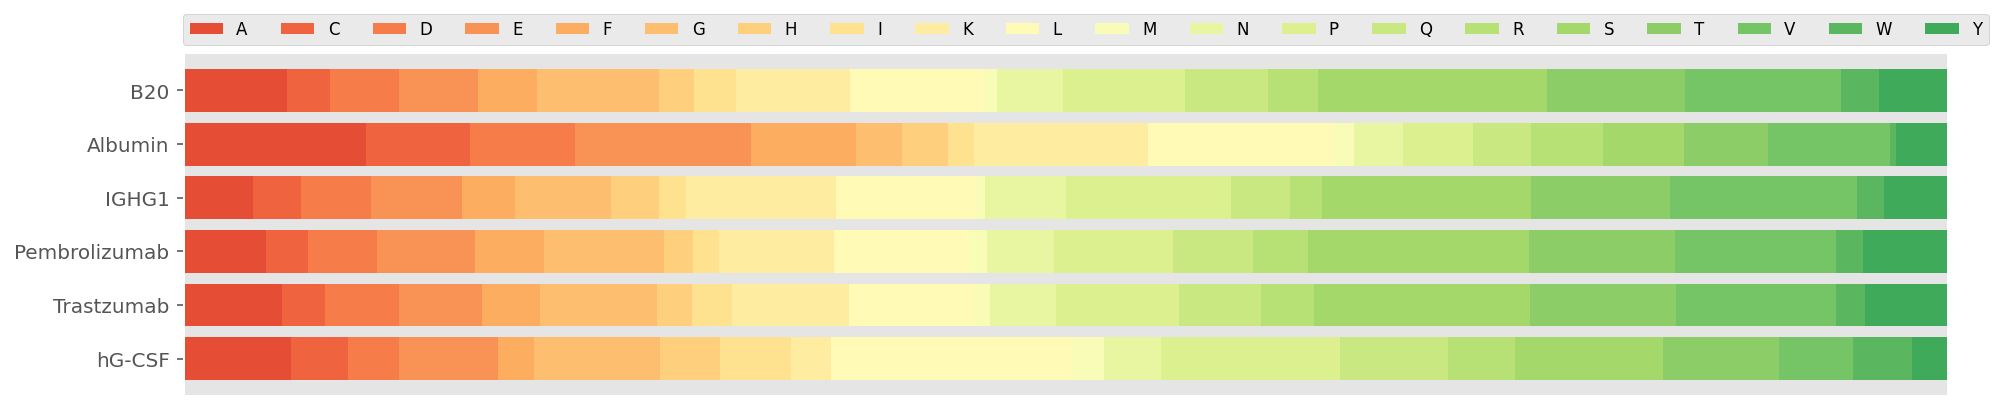

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# data prep
data = analyzed_seq.get_amino_acids_percent()
names = list(data.keys())
values = list(data.values())

category_names = names
results = {
    target_name: values,
    "Albumin": [
        0.10344827586206896,
        0.059113300492610835,
        0.059113300492610835,
        0.10016420361247948,
        0.059113300492610835,
        0.026272577996715927,
        0.026272577996715927,
        0.014778325123152709,
        0.09852216748768473,
        0.10509031198686371,
        0.011494252873563218,
        0.027914614121510674,
        0.03940886699507389,
        0.03284072249589491,
        0.041050903119868636,
        0.04597701149425287,
        0.047619047619047616,
        0.06896551724137931,
        0.003284072249589491,
        0.029556650246305417,
    ],
    "IGHG1": [
        0.03939393939393939,
        0.02727272727272727,
        0.03939393939393939,
        0.051515151515151514,
        0.030303030303030304,
        0.05454545454545454,
        0.02727272727272727,
        0.015151515151515152,
        0.08484848484848485,
        0.07878787878787878,
        0.006060606060606061,
        0.045454545454545456,
        0.09393939393939393,
        0.03333333333333333,
        0.01818181818181818,
        0.11818181818181818,
        0.07878787878787878,
        0.10606060606060606,
        0.015151515151515152,
        0.03636363636363636,
    ],
    "Pembrolizumab": [
        0.04661654135338346,
        0.02406015037593985,
        0.039097744360902256,
        0.055639097744360905,
        0.039097744360902256,
        0.06766917293233082,
        0.016541353383458645,
        0.015037593984962405,
        0.06466165413533835,
        0.07669172932330827,
        0.010526315789473684,
        0.03759398496240601,
        0.06766917293233082,
        0.045112781954887216,
        0.031578947368421054,
        0.12481203007518797,
        0.08270676691729323,
        0.09172932330827067,
        0.015037593984962405,
        0.0481203007518797,
    ],
    "Trastzumab": [
        0.05580693815987934,
        0.024132730015082957,
        0.042232277526395176,
        0.04675716440422323,
        0.033182503770739065,
        0.06636500754147813,
        0.0196078431372549,
        0.02262443438914027,
        0.06636500754147813,
        0.07088989441930618,
        0.00904977375565611,
        0.03770739064856712,
        0.0693815987933635,
        0.04675716440422323,
        0.030165912518853696,
        0.12217194570135746,
        0.08295625942684766,
        0.09049773755656108,
        0.016591251885369532,
        0.04675716440422323,
    ],
    "hG-CSF": [
        0.061004784688995214,
        0.03229665071770335,
        0.028708133971291867,
        0.056220095693779906,
        0.02033492822966507,
        0.07177033492822966,
        0.03349282296650718,
        0.04066985645933014,
        0.022727272727272728,
        0.13636363636363635,
        0.017942583732057416,
        0.03229665071770335,
        0.10167464114832536,
        0.061004784688995214,
        0.03827751196172249,
        0.08373205741626795,
        0.06578947368421052,
        0.041866028708133975,
        0.03349282296650718,
        0.02033492822966507,
    ],
}

labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
category_colors = plt.colormaps["RdYlGn"](np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(14.8, 3))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    rects = ax.barh(labels, widths, left=starts, height=0.8, label=colname, color=color)

    r, g, b, _ = color
    text_color = "white" if r * g * b < 0.5 else "darkgrey"
#     ax.bar_label(rects, fmt='%.2f', label_type='center', color=text_color)

ax.legend(
    ncol=len(category_names),
    bbox_to_anchor=(-0.005, 1),
    loc="lower left",
    fontsize="small",
)
plt.tight_layout()
plt.show()

## Potential sites of chemical modification

An initial scan of the protein sequences is presented based purely upon sequence. If a structural analysis was also requested, this section should be used in conjunction with the molecular surface analysis described in a subsequent section. Any of the sites listed below could be candidates for further consideration if the molecular surface analysis shows that they are significantly exposed on the surface of the protein, increasing their propensity for chemical modification. The canonical sequence analysis is also helpful here, since each of these sites can also be considered in the context of their frequency of occurrence within the canonical library of homologous sequences.

### Potential deamidation positions

Asparagine (N) and glutamine (Q) residues are particularly prone to deamidation when they are followed in the sequence by amino acids with smaller side chains, that leave the intervening peptide group more exposed. Deamidation proceeds much more quickly if the susceptible amino acid is followed by a small, flexible residue such as glycine whose low steric hindrance leaves the peptide group open for attack.

- Search patterns: ASN/GLN-ALA/GLY/SER/THR

In [7]:
import re

my_seq = str(first_record.seq)
target_name = first_record.name

deamidation_pattern = "(N|Q)(A|G|S|T)"

match = re.finditer(deamidation_pattern, my_seq)

if re.search(deamidation_pattern, my_seq):
    print(f"Deamination pattern found in:{target_name:->20}")
    for i in match:
        print(f"{i.start()+1}-{i.group()}-{i.end()}")
else:
    print(f"There is no deamination pattern found in {target_name}.")

Deamination pattern found in:--------------B20_HC
30-NG-31
39-QA-40
77-NT-78
84-NS-85
113-QG-114
163-NS-164
179-QS-180
200-QT-201
212-NT-213
290-NA-291
301-NS-302
319-NG-320
388-NG-389
423-QG-424


In [8]:
import re

my_seq = str(second_record.seq)
target_name = second_record.name

deamidation_pattern = "(N|Q)(A|G|S|T)"

match = re.finditer(deamidation_pattern, my_seq)

if re.search(deamidation_pattern, my_seq):
    print(f"Deamination pattern found in:{target_name:->20}")
    for i in match:
        print(f"{i.start()+1}-{i.group()}-{i.end()}")
else:
    print(f"There is no deamination pattern found in {target_name}.")

Deamination pattern found in:--------------B20_LC
6-QS-7
90-QS-91
92-NT-93
100-QG-101
152-NA-153
155-QS-156
158-NS-159
199-QG-200


### Potential o-linked glycosylation sites

The O-linked glycosylation of serine and threonine residues seems to be particularly sensitive to the presence of one or more proline residues in their vicinity in the sequence, particularly in the 2-1 and +3 positions.

- Search patterns: PRO-SER/THR


In [9]:
my_seq = str(first_record.seq)
target_name = first_record.name

o_glycosylation_pattern = "P(S|T)"

match = re.finditer(o_glycosylation_pattern, my_seq)

if re.search(o_glycosylation_pattern, my_seq):
    print(f"Potential o-linked glycosylation sites:{target_name:->20}")
    for i in match:
        print(f"{i.start()+1}-{i.group()}-{i.end()}")
else:
    print("There is no pattern found.")

Potential o-linked glycosylation sites:--------------B20_HC
127-PS-128
134-PS-135
193-PS-194
210-PS-211
242-PS-243
357-PS-358
378-PS-379


In [10]:
my_seq = str(second_record.seq)
target_name = second_record.name

o_glycosylation_pattern = "P(S|T)"

match = re.finditer(o_glycosylation_pattern, my_seq)

if re.search(o_glycosylation_pattern, my_seq):
    print(f"Potential o-linked glycosylation sites:{target_name:->20}")
    for i in match:
        print(f"{i.start()+1}-{i.group()}-{i.end()}")
else:
    print("There is no pattern found.")

Potential o-linked glycosylation sites:--------------B20_LC
8-PS-9
59-PS-60
113-PS-114
120-PS-121


- Search patterns: SER/THR-X-X-PRO

In [11]:
my_seq = str(first_record.seq)
target_name = first_record.name

o_glycosylation_pattern = "(S|T)[A-Z]{2}P"

match = re.finditer(o_glycosylation_pattern, my_seq)

if re.search(o_glycosylation_pattern, my_seq):
    print(f"Potential o-linked glycosylation sites:{target_name:->20}")
    for i in match:
        print(f"{i.start()+1}-{i.group()}-{i.end()}")
else:
    print("There is no pattern found.")

Potential o-linked glycosylation sites:--------------B20_HC
102-STSP-105
124-TKGP-127
128-SVFP-131
229-TCPP-232
258-SRTP-261
354-TLPP-357
397-TTPP-400
446-SLSP-449


In [12]:
my_seq = str(second_record.seq)
target_name = second_record.name

o_glycosylation_pattern = "(S|T)[A-Z]{2}P"

match = re.finditer(o_glycosylation_pattern, my_seq)

if re.search(o_glycosylation_pattern, my_seq):
    print(f"Potential o-linked glycosylation sites:{target_name:->20}")
    for i in match:
        print(f"{i.start()+1}-{i.group()}-{i.end()}")
else:
    print("There is no pattern found.")

Potential o-linked glycosylation sites:--------------B20_LC
5-TQSP-8
56-SGVP-59
77-SLQP-80


### Potential n-linked glycosylation sites

- Search patterns: ASN-X-SER/THR

In [13]:
my_seq = str(first_record.seq)
target_name = first_record.name

N_glycosylation_pattern = "N[A-Z][S|T]"
# N_glycosylation_pattern = 'N[^P][ST][^P]'
# putting a caret ^ at the start of the group will negate it
# and match any character that is not in that group
match = re.finditer(N_glycosylation_pattern, my_seq)

if re.search(N_glycosylation_pattern, my_seq):
    print(f"Potential n-linked glycosylation sites:{target_name:->20}")
    for i in match:
        print(f"{i.start()+1}-{i.group()}-{i.end()}")
else:
    print("There is no pattern found.")

Potential n-linked glycosylation sites:--------------B20_HC
30-NGS-32
301-NST-303


In [14]:
my_seq = str(second_record.seq)
target_name = second_record.name

N_glycosylation_pattern = "N[A-Z][S|T]"
# N_glycosylation_pattern = 'N[^P][ST][^P]'
# putting a caret ^ at the start of the group will negate it
# and match any character that is not in that group
match = re.finditer(N_glycosylation_pattern, my_seq)

if re.search(N_glycosylation_pattern, my_seq):
    print(f"Potential n-linked glycosylation sites:{target_name:->20}")
    for i in match:
        print(f"{i.start()+1}-{i.group()}-{i.end()}")
else:
    print("There is no pattern found.")

Potential n-linked glycosylation sites:--------------B20_LC
92-NTS-94


## Secondary structure fraction

The fraction of amino acids that tend to be found in the three classical secondary structures. These are beta sheets, alpha helixes, and turns (where the residues change direction).

 - Amino acids in helix: V, I, Y, F, W, L.
 - Amino acids in turn: N, P, G, S.
 - Amino acids in sheet: E, M, A, L.

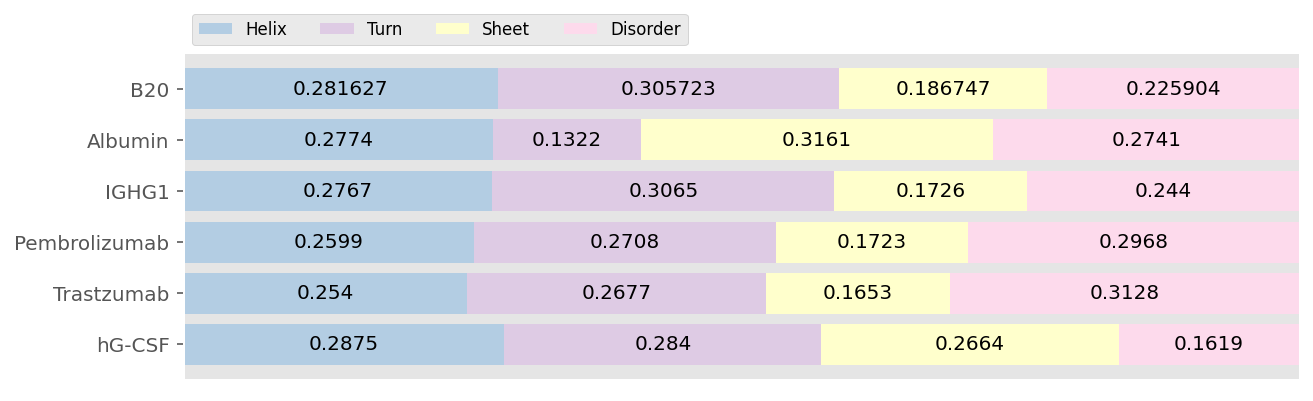

In [15]:
# import matplotlib.pyplot as plt
# %config InlineBackend.figure_format = 'retina'

# plt.figure(figsize=(5,5))

# data = analyzed_seq.secondary_structure_fraction()
# rest = (1-sum(analyzed_seq.secondary_structure_fraction()),)
# names = ['Helix','Turn','Sheet','Disorder']
# values = analyzed_seq.secondary_structure_fraction() + rest
# colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
# # colors = ['#ECD078', '#D95B43', '#C02942', '#542437', '#53777A'] #Thought Provoking
# wedgeprops={'width': 0.3, 'edgecolor': 'w', 'linewidth': 5}

# plt.pie(values, labels=names, autopct='%.1f%%', startangle=90, labeldistance=1.05,
#         counterclock=False, colors=colors, wedgeprops=wedgeprops)
# plt.show()

import numpy as np
import matplotlib.pyplot as plt

# data prep
my_seq = str(second_record.seq) + str(first_record.seq)
target_name = first_record.name[:-3]
total_aa = len(my_seq)
analyzed_seq = ProteinAnalysis(my_seq)
data = analyzed_seq.secondary_structure_fraction()
rest = (1 - sum(analyzed_seq.secondary_structure_fraction()),)
values = list(analyzed_seq.secondary_structure_fraction() + rest)

category_names = ["Helix", "Turn", "Sheet", "Disorder"]
results = {
    target_name: values,
    "Albumin": [0.2774, 0.1322, 0.3161, 0.2741],
    "IGHG1": [0.2767, 0.3065, 0.1726, 0.2440],
    "Pembrolizumab": [0.2599, 0.2708, 0.1723, 0.2968],
    "Trastzumab": [0.2540, 0.2677, 0.1653, 0.3128],
    "hG-CSF": [0.2875, 0.2840, 0.2664, 0.1619],
}

labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
category_colors = plt.colormaps["Pastel1"](np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(10, 3))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    rects = ax.barh(labels, widths, left=starts, height=0.8, label=colname, color=color)

    r, g, b, _ = color
    text_color = "white" if r * g * b < 0.5 else "k"
    ax.bar_label(rects, label_type="center", color=text_color)

ax.legend(
    ncol=len(category_names), bbox_to_anchor=(0, 1), loc="lower left", fontsize="small"
)

plt.show()

## Secondary structure prediction

Protein secondary structure prediction is one of the most important and challenging problems in bioinformatics. Here in, the P-SEA algorithm that to predict the secondary structures of proteins sequences based only on knowledge of their primary structure.

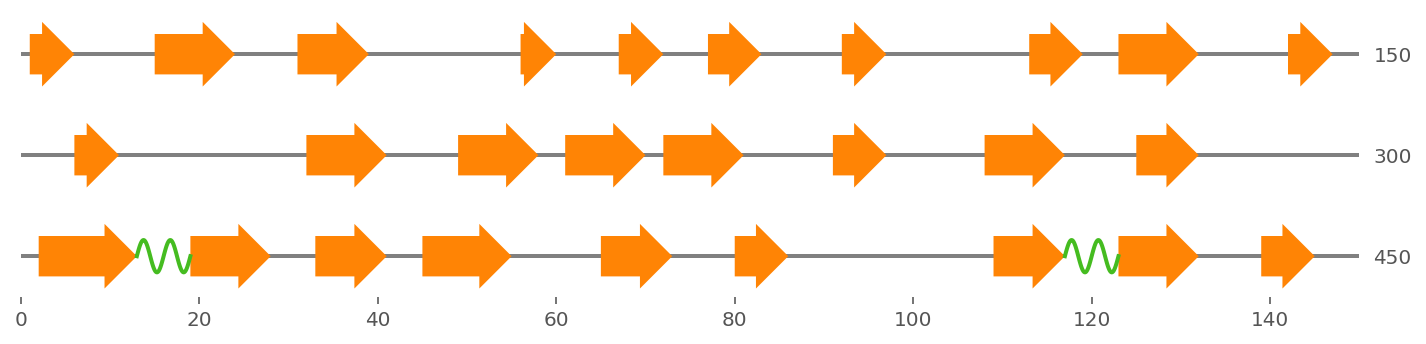

In [16]:
# Code source: Patrick Kunzmann
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import biotite
import biotite.structure as struc
import biotite.sequence as seq
import biotite.sequence.graphics as graphics
import biotite.structure.io.pdb as pdb

# Create 'FeaturePlotter' subclasses
# for drawing the scondary structure features


class HelixPlotter(graphics.FeaturePlotter):

    def __init__(self):
        pass

    # Check whether this class is applicable for drawing a feature
    def matches(self, feature):
        if feature.key == "SecStr":
            if "sec_str_type" in feature.qual:
                if feature.qual["sec_str_type"] == "helix":
                    return True
        return False

    # The drawing function itself
    def draw(self, axes, feature, bbox, loc, style_param):
        # Approx. 1 turn per 3.6 residues to resemble natural helix
        n_turns = np.ceil((loc.last - loc.first + 1) / 3.6)
        x_val = np.linspace(0, n_turns * 2 * np.pi, 100)
        # Curve ranges from 0.3 to 0.7
        y_val = (-0.4 * np.sin(x_val) + 1) / 2

        # Transform values for correct location in feature map
        x_val *= bbox.width / (n_turns * 2 * np.pi)
        x_val += bbox.x0
        y_val *= bbox.height
        y_val += bbox.y0

        # Draw white background to overlay the guiding line
        background = Rectangle(
            bbox.p0, bbox.width, bbox.height, color="white", linewidth=0
        )
        axes.add_patch(background)
        axes.plot(x_val, y_val, linewidth=2, color=biotite.colors["dimgreen"])


class SheetPlotter(graphics.FeaturePlotter):

    def __init__(self, head_width=0.8, tail_width=0.5):
        self._head_width = head_width
        self._tail_width = tail_width

    def matches(self, feature):
        if feature.key == "SecStr":
            if "sec_str_type" in feature.qual:
                if feature.qual["sec_str_type"] == "sheet":
                    return True
        return False

    def draw(self, axes, feature, bbox, loc, style_param):
        x = bbox.x0
        y = bbox.y0 + bbox.height / 2
        dx = bbox.width
        dy = 0

        if loc.defect & seq.Location.Defect.MISS_RIGHT:
            # If the feature extends into the prevoius or next line
            # do not draw an arrow head
            draw_head = False
        else:
            draw_head = True

        axes.add_patch(
            biotite.AdaptiveFancyArrow(
                x,
                y,
                dx,
                dy,
                self._tail_width * bbox.height,
                self._head_width * bbox.height,
                # Create head with 90 degrees tip
                # -> head width/length ratio = 1/2
                head_ratio=0.5,
                draw_head=draw_head,
                color=biotite.colors["orange"],
                linewidth=0,
            )
        )


# Helper function to convert secondary structure array to annotation
# and visualize it
def visualize_secondary_structure(sse, first_id):

    def _add_sec_str(annotation, first, last, str_type):
        if str_type == "a":
            str_type = "helix"
        elif str_type == "b":
            str_type = "sheet"
        else:
            # coil
            return
        feature = seq.Feature(
            "SecStr", [seq.Location(first, last)], {"sec_str_type": str_type}
        )
        annotation.add_feature(feature)

    # Find the intervals for each secondary structure element
    # and add to annotation
    annotation = seq.Annotation()
    curr_sse = None
    curr_start = None
    for i in range(len(sse)):
        if curr_start is None:
            curr_start = i
            curr_sse = sse[i]
        else:
            if sse[i] != sse[i - 1]:
                _add_sec_str(
                    annotation, curr_start + first_id, i - 1 + first_id, curr_sse
                )
                curr_start = i
                curr_sse = sse[i]
    # Add last secondary structure element to annotation
    _add_sec_str(annotation, curr_start + first_id, i - 1 + first_id, curr_sse)

    fig = plt.figure(figsize=(10, 2.5))
    ax = fig.add_subplot(111)
    graphics.plot_feature_map(
        ax,
        annotation,
        symbols_per_line=150,
        loc_range=(first_id, first_id + len(sse)),
        show_numbers=True,
        show_line_position=True,
        feature_plotters=[HelixPlotter(), SheetPlotter()],
    )
    fig.tight_layout()


# Fetch and load structure
pdb_file = pdb.PDBFile.read("../data/structure.pdb")
array = pdb_file.get_structure(model=1)
# Transketolase homodimer
tk_dimer = array[struc.filter_amino_acids(array)]
# Transketolase monomer
tk_mono = tk_dimer[tk_dimer.chain_id == "B"]


sse = struc.annotate_sse(array, chain_id="B")
visualize_secondary_structure(sse, tk_mono.res_id[0])

plt.show()

## Structural analysis


### Calculation of protein diameter

This calculates the diameter of a protein defined as the maximum pairwise atom distance.

In [17]:
# Code source: Patrick Kunzmann
# License: BSD 3 clause

from Bio import SeqIO
import numpy as np
import biotite.structure as struc

# record = SeqIO.read("../data/sequence.fasta", "fasta")
# target_name = record.name


def get_diameter(pdb_array):
    atom_array = pdb_array
    # Remove all non-amino acids
    atom_array = atom_array[struc.filter_amino_acids(atom_array)]
    coord = atom_array.coord
    # Calculate all pairwise difference vectors
    diff = coord[:, np.newaxis, :] - coord[np.newaxis, :, :]
    # Calculate absolute of difference vectors -> square distances
    sq_dist = np.sum(diff * diff, axis=-1)
    # Maximum distance is diameter
    diameter = np.sqrt(np.max(sq_dist))
    return diameter


# Example application
diameter = get_diameter(array)
print(f"# Diameter of {target_name} is: {diameter:->30.3f} Angstrong.")

# Diameter of B20 is: -----------------------126.996 Angstrong.


## Protein Scales

Protein scales are a way of measuring certain attributes of residues over the length of the peptide sequence using a sliding window. Scales are comprised of values for each amino acid based on different physical and chemical properties, such as hydrophobicity, secondary structure tendencies, and surface accessibility. As opposed to some chain-level measures like overall molecule behavior, scales allow a more granular understanding of how smaller sections of the sequence will behave.

- kd → Kyte & Doolittle Index of Hydrophobicity
- hw → Hopp & Wood Index of Hydrophilicity
- em → Emini Surface fractional probability (Surface Accessibility
- 
 
 
### Hydrophobicity index

hydrophobicity is the physical property of a molecule that is seemingly repelled from a mass of water (known as a hydrophobe).

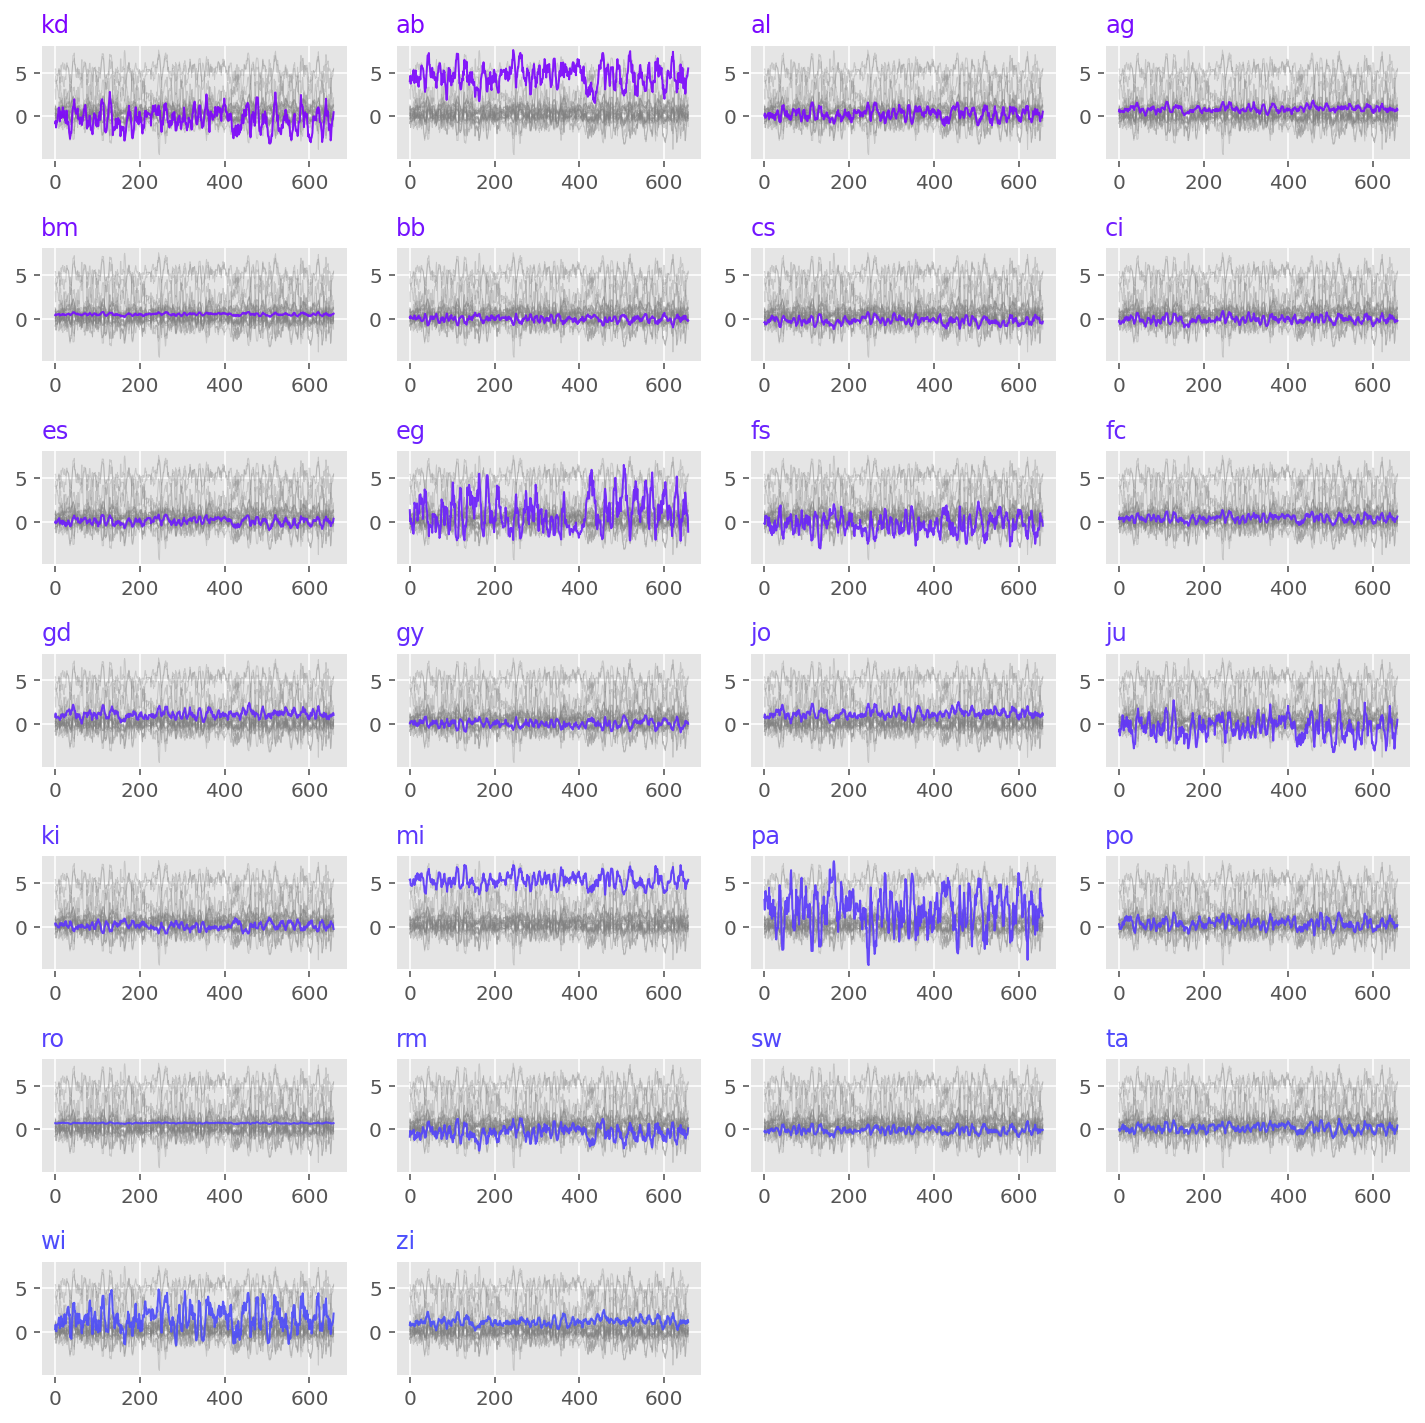

In [18]:
# plt.figure(figsize=(15,6))
# plt.style.use('ggplot')

# gravy_scales = ['kd','ab','al','ag','bm','bb','cs','ci','es','eg','fs','fc','gd']

# for i in gravy_scales:
#     method_to_call = getattr(ProtParamData, i)
#     data = analyzed_seq.protein_scale(window=7, param_dict=method_to_call)
#     plt.plot(data, label=i, alpha=0.7)

# plt.title('Hydrophobicity(1)')
# plt.xlabel('Position')
# plt.ylabel('')
# plt.legend()
# plt.show()

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Bio.SeqUtils.ProtParam import ProtParamData

gravy_scales = [
    "kd",
    "ab",
    "al",
    "ag",
    "bm",
    "bb",
    "cs",
    "ci",
    "es",
    "eg",
    "fs",
    "fc",
    "gd",
    "gy",
    "jo",
    "ju",
    "ki",
    "mi",
    "pa",
    "po",
    "ro",
    "rm",
    "sw",
    "ta",
    "wi",
    "zi",
]
df = pd.DataFrame()

for i in gravy_scales:
    method_to_call = getattr(ProtParamData, i)
    df[i] = analyzed_seq.protein_scale(window=7, param_dict=method_to_call)

plt.figure(figsize=(10, 10))
plt.style.use("ggplot")

# create a color palette
palette = plt.get_cmap("rainbow")

# multiple line plot
num = 0
for column in df.columns:
    num += 1
    # Find the right spot on the plot
    plt.subplot(7, 4, num)

    # plot every group, but discrete
    for v in df.columns:
        plt.plot(df[v], marker="", color="grey", linewidth=0.5, alpha=0.3)

    # Plot the lineplot
    plt.plot(
        df[column],
        marker="",
        color=palette(num),
        linewidth=1.0,
        alpha=0.9,
        label=column,
    )

    # Add title
    plt.title(column, loc="left", fontsize=12, fontweight=0, color=palette(num))

plt.tight_layout()
plt.show()

### Hydrophilicity index

Hydrophilicity is the tendency of a molecule to be solvated by water. 

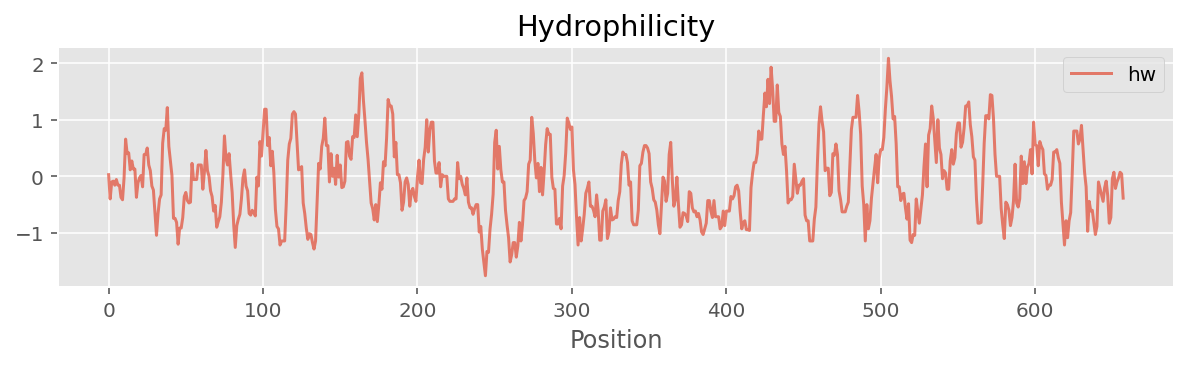

In [19]:
plt.figure(figsize=(10, 2.2))
plt.style.use("ggplot")
_list = ["hw"]

for i in _list:
    method_to_call = getattr(ProtParamData, i)
    data = analyzed_seq.protein_scale(window=7, param_dict=method_to_call)
    plt.plot(data, label=i, alpha=0.7)

plt.title("Hydrophilicity")
plt.xlabel("Position")
plt.ylabel("")
plt.legend()
plt.show()

### Flexibility index

Proteins are dynamic entities, and they possess an inherent flexibility that allows them to function through molecular interactions within the cell.

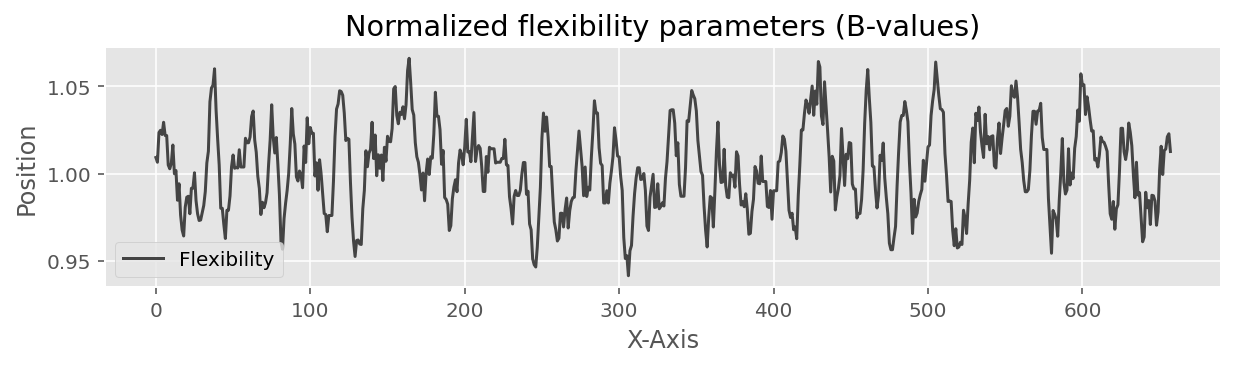

In [20]:
plt.figure(figsize=(10, 2.2))
plt.style.use("ggplot")


data = analyzed_seq.protein_scale(window=7, param_dict=ProtParamData.Flex)
plt.plot(data, label="Flexibility", color="k", alpha=0.7)

plt.title("Normalized flexibility parameters (B-values)")  # average
plt.xlabel("X-Axis")
plt.ylabel("Position")
plt.legend()
plt.show()

### Surface accessibility

Data describing the solvent-accessible surface of a molecule is of great utility in the development of that molecule as a therapeutic, particularly in the case of antibodies. In the context of this report, the most obvious application of molecular surface data is in combination with the potential sites of chemical modification, described in the previous section. Proteins are known to undergo many different chemical modifications as a result of interactions with their aqueous environment. The probability and kinetic rate of such a modification is greatly enhanced by the degree of exposure of the potential modification site to the solvent environment. The solvent-accessible surface for each residue depends upon the degree of exposure of the residue on the surface, but also on the size of the residue side chain.

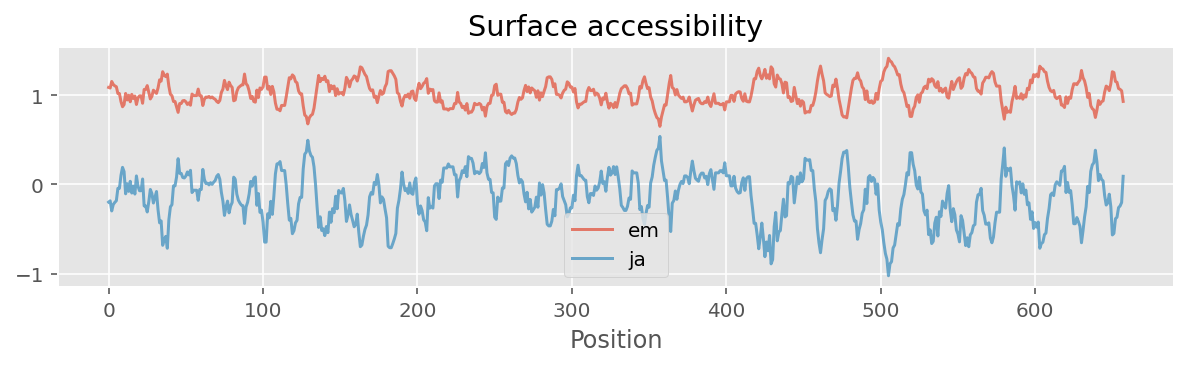

In [21]:
# Surface accessibility
# Vergoten G & Theophanides T, Biomolecular Structure and Dynamics,
# pg.138 (1997).
# 1 Emini Surface fractional probability
# 2 Janin Interior to surface transfer energy scale

plt.figure(figsize=(10, 2.2))
plt.style.use("ggplot")

_list = ["em", "ja"]

for i in _list:
    method_to_call = getattr(ProtParamData, i)
    data = analyzed_seq.protein_scale(window=7, param_dict=method_to_call)
    plt.plot(data, label=i, alpha=0.7)

plt.title("Surface accessibility")
plt.xlabel("Position")
plt.ylabel("")
plt.legend()
plt.show()

### Instability index

The instability index provides an estimate of the stability of your protein in a test tube. Statistical analysis of 12 unstable and 32 stable proteins has revealed that there are certain dipeptides, the occurence of which is significantly different in the unstable proteins compared with those in the stable ones.

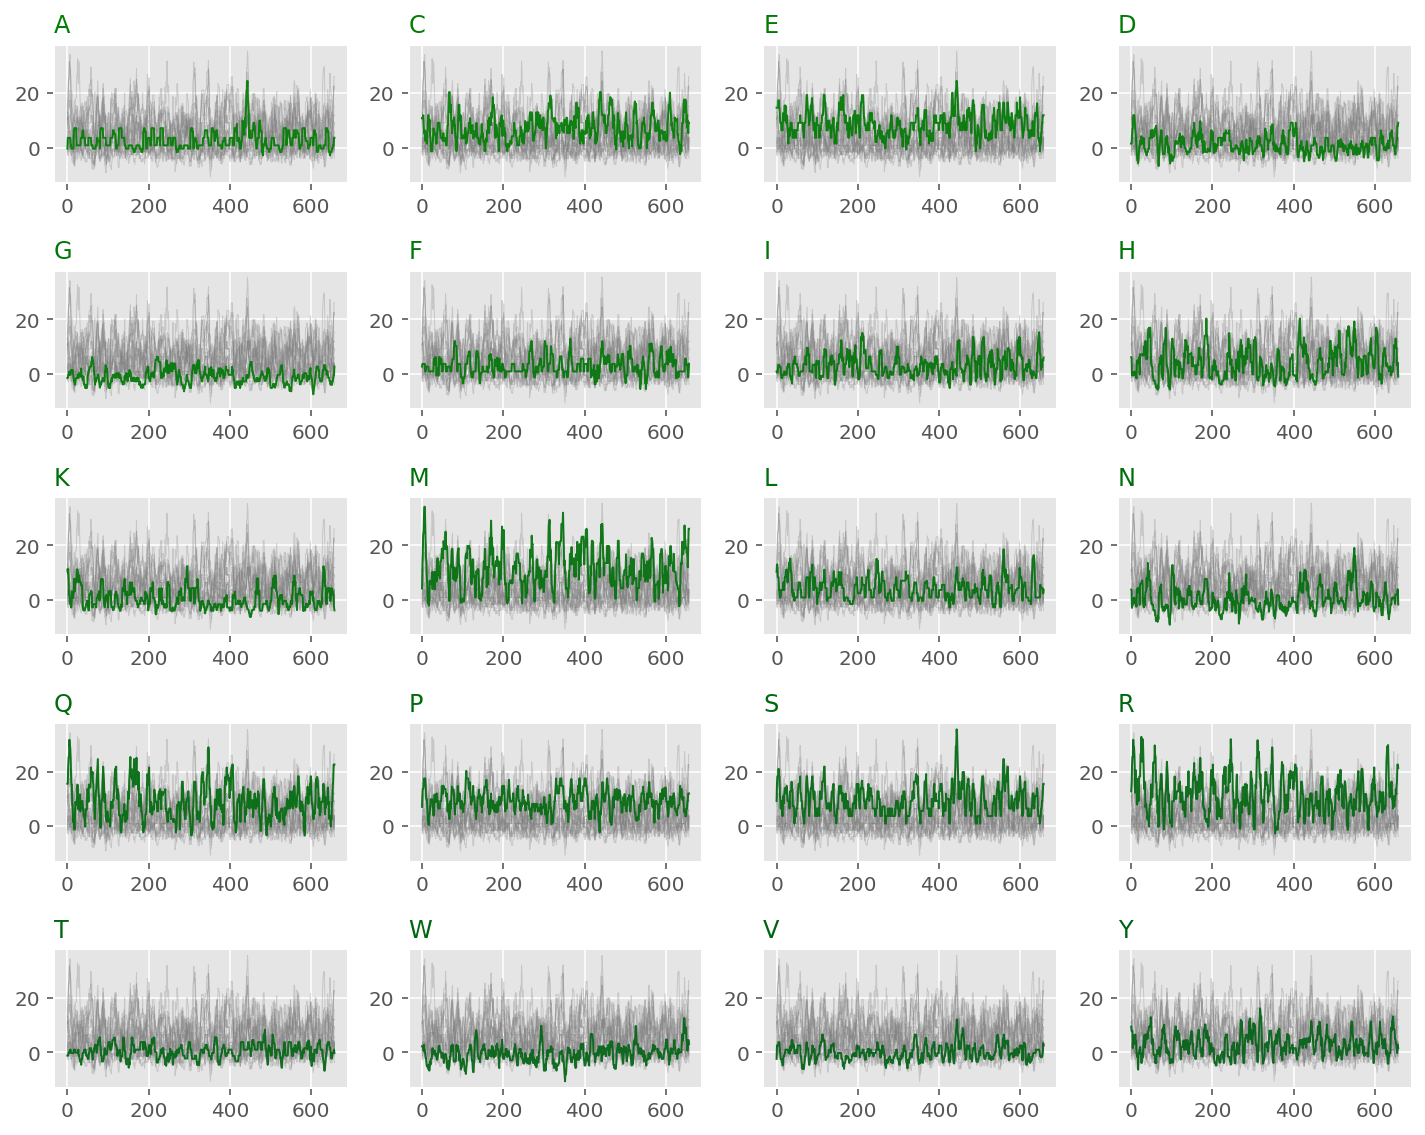

In [22]:
_list = list("ACEDGFIHKMLNQPSRTWVY")
df = pd.DataFrame()

for i in _list:
    df[i] = analyzed_seq.protein_scale(window=7, param_dict=ProtParamData.DIWV[i])

plt.figure(figsize=(10, 8))
plt.style.use("ggplot")

# create a color palette
palette = plt.get_cmap("ocean")

# multiple line plot
num = 0
for column in df.columns:
    num += 1
    # Find the right spot on the plot
    plt.subplot(5, 4, num)

    # plot every group, but discrete
    for v in df.columns:
        plt.plot(df[v], marker="", color="grey", linewidth=0.5, alpha=0.3)

    # Plot the lineplot
    plt.plot(
        df[column],
        marker="",
        color=palette(num),
        linewidth=1.0,
        alpha=0.9,
        label=column,
    )

    # Add title
    plt.title(column, loc="left", fontsize=12, fontweight=0, color=palette(num))

plt.tight_layout()
plt.show()